# Set Parameter
- Attention = Luong
- Teacher Forcing Ratio = 0.5
- Layer = 1
- Batch size = 32
- Drop out = 0.2
- Hidden unit = 50
- Epochs = 100
- N = 100
- Data Length = 10K
- Data = [Bracket, non-Bracket, Palindrome, Matching-Pair, unMatching]
- Deduplication & Random Split

# Import packages

import useful packages for experiments

In [1]:
import os
import argparse
import logging

import torch
from torch.optim.lr_scheduler import StepLR
import torchtext

from trainer.supervised_trainer import SupervisedTrainer
from trainer.supervised_trainer_unmatching import SupervisedTrainer_unmatching
from models.encoderRNN import EncoderRNN
from models.decoderRNN import DecoderRNN
from models.seq2seq import Seq2seq
from loss.loss import Perplexity
from optim.optim import Optimizer
from dataset import fields
from evaluator.predictor import Predictor

import matplotlib.pyplot as plt

/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='elementwise_mean' instead.
  warnings.warn(warning.format(ret))
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='elementwise_mean' instead.
  warnings.warn(warning.format(ret))


# Log format

In [2]:
log_level = 'info'
LOG_FORMAT = '%(asctime)s %(levelname)-6s %(message)s'
logging.basicConfig(format=LOG_FORMAT, level=getattr(logging, log_level.upper()))

In [3]:
data_name = ["Bracket_rand", "non-Bracket_rand", "Palindrome_rand", "Matching-Pair_rand"]
data_path = ["data/bracket_rand/N100", "data/nonbracket_rand/N100", "data/palindrome_rand/N100", "data/matching_pairs_rand/N100"]
character_accuracy = []
sentance_accuracy = []

# Prepare dataset

data : Bracket_rand


/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/modules/rnn.py:38: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
2019-02-28 00:06:16,582 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
2019-02-28 00:07:43,865 INFO   Finished epoch 1: Train loss: 20.6039,

2019-02-28 01:35:08,320 INFO   Finished epoch 53: Train loss: 1.6769, Dev loss: 2.1458, Accuracy(Character): 0.7022, Accuracy(Word): 0.1998
2019-02-28 01:36:46,272 INFO   Finished epoch 54: Train loss: 1.6041, Dev loss: 1.9109, Accuracy(Character): 0.7325, Accuracy(Word): 0.1944
2019-02-28 01:38:27,801 INFO   Finished epoch 55: Train loss: 1.6081, Dev loss: 2.1572, Accuracy(Character): 0.7325, Accuracy(Word): 0.2092
2019-02-28 01:40:08,877 INFO   Finished epoch 56: Train loss: 1.6644, Dev loss: 2.3587, Accuracy(Character): 0.6878, Accuracy(Word): 0.1948
2019-02-28 01:41:45,568 INFO   Finished epoch 57: Train loss: 1.5419, Dev loss: 1.7831, Accuracy(Character): 0.7659, Accuracy(Word): 0.2218
2019-02-28 01:43:23,308 INFO   Finished epoch 58: Train loss: 1.6498, Dev loss: 1.8748, Accuracy(Character): 0.7589, Accuracy(Word): 0.2168
2019-02-28 01:45:00,384 INFO   Finished epoch 59: Train loss: 1.5343, Dev loss: 1.6858, Accuracy(Character): 0.7862, Accuracy(Word): 0.2240
2019-02-28 01:46:44,

data : non-Bracket_rand


2019-02-28 02:53:22,082 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-28 02:54:48,373 INFO   Finished epoch 1: Train loss: 15.7636, Dev loss: 13.9496, Accuracy(Character): 0.1270, Accuracy(Word): 0.0000
2019-02-28 02:56:13,466 INFO   Finished epoch 2: Train loss: 11.5223, Dev loss: 12.6412, Accuracy(Character): 0.1488, Accuracy(Word): 0.0000
2019-02-28 02:57:38,156 INFO   Finished epoch 3: Train loss: 10.6963, Dev loss: 15.2471, Accuracy(Character): 0.1432, Accuracy(Word): 0.0000
2019-02-28 02:59:01,098 INFO   Finished epoch 4: Train loss: 11.1026, Dev loss: 12.6309, Accuracy(Character): 0.1520, Accuracy(Word): 0.0006
2019-02-28 03:00:30,746 INFO   Finished epoch 5: Train loss: 10.4351, Dev loss: 15.3213, Accuracy(Character): 0.1637, Accuracy(Word): 0.0024
2019-02-28 03:01:52,074 INFO   Finished epoch 6: Train loss: 10.9262, Dev loss: 29.9111, Accuracy(Character): 0.1447,

2019-02-28 04:09:27,506 INFO   Finished epoch 59: Train loss: 2.6503, Dev loss: 3.0510, Accuracy(Character): 0.5769, Accuracy(Word): 0.1886
2019-02-28 04:10:23,037 INFO   Finished epoch 60: Train loss: 2.4788, Dev loss: 3.7073, Accuracy(Character): 0.5500, Accuracy(Word): 0.1798
2019-02-28 04:11:11,640 INFO   Finished epoch 61: Train loss: 2.4520, Dev loss: 3.7200, Accuracy(Character): 0.5491, Accuracy(Word): 0.1754
2019-02-28 04:11:57,797 INFO   Finished epoch 62: Train loss: 2.4672, Dev loss: 3.1980, Accuracy(Character): 0.5635, Accuracy(Word): 0.1732
2019-02-28 04:12:44,674 INFO   Finished epoch 63: Train loss: 2.3158, Dev loss: 3.3450, Accuracy(Character): 0.5584, Accuracy(Word): 0.1620
2019-02-28 04:13:33,019 INFO   Finished epoch 64: Train loss: 2.7656, Dev loss: 3.6962, Accuracy(Character): 0.5529, Accuracy(Word): 0.1796
2019-02-28 04:14:23,297 INFO   Finished epoch 65: Train loss: 2.5000, Dev loss: 3.4366, Accuracy(Character): 0.5695, Accuracy(Word): 0.1708
2019-02-28 04:15:12,

data : Palindrome_rand


2019-02-28 04:42:17,704 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-28 04:43:08,405 INFO   Finished epoch 1: Train loss: 27.0417, Dev loss: 24.6110, Accuracy(Character): 0.1526, Accuracy(Word): 0.0000
2019-02-28 04:43:59,653 INFO   Finished epoch 2: Train loss: 20.9476, Dev loss: 22.6000, Accuracy(Character): 0.1601, Accuracy(Word): 0.0000
2019-02-28 04:44:51,232 INFO   Finished epoch 3: Train loss: 19.7671, Dev loss: 21.6915, Accuracy(Character): 0.1709, Accuracy(Word): 0.0000
2019-02-28 04:45:39,855 INFO   Finished epoch 4: Train loss: 18.4025, Dev loss: 25.5874, Accuracy(Character): 0.1629, Accuracy(Word): 0.0000
2019-02-28 04:46:28,469 INFO   Finished epoch 5: Train loss: 15.7324, Dev loss: 20.3172, Accuracy(Character): 0.2094, Accuracy(Word): 0.0000
2019-02-28 04:47:15,133 INFO   Finished epoch 6: Train loss: 9.4872, Dev loss: 16.1900, Accuracy(Character): 0.2255, 

2019-02-28 05:30:12,790 INFO   Finished epoch 59: Train loss: 5.0833, Dev loss: 13.6107, Accuracy(Character): 0.4002, Accuracy(Word): 0.1462
2019-02-28 05:31:01,721 INFO   Finished epoch 60: Train loss: 6.0618, Dev loss: 8.5540, Accuracy(Character): 0.4088, Accuracy(Word): 0.1374
2019-02-28 05:31:51,284 INFO   Finished epoch 61: Train loss: 8.7065, Dev loss: 8.0945, Accuracy(Character): 0.3993, Accuracy(Word): 0.1056
2019-02-28 05:32:37,459 INFO   Finished epoch 62: Train loss: 5.3752, Dev loss: 7.2848, Accuracy(Character): 0.4113, Accuracy(Word): 0.1456
2019-02-28 05:33:25,736 INFO   Finished epoch 63: Train loss: 5.5697, Dev loss: 10.0764, Accuracy(Character): 0.3678, Accuracy(Word): 0.1092
2019-02-28 05:34:13,099 INFO   Finished epoch 64: Train loss: 5.2258, Dev loss: 6.9538, Accuracy(Character): 0.4186, Accuracy(Word): 0.1450
2019-02-28 05:35:00,560 INFO   Finished epoch 65: Train loss: 5.9071, Dev loss: 7.5050, Accuracy(Character): 0.4081, Accuracy(Word): 0.1012
2019-02-28 05:35:4

data : Matching-Pair_rand


2019-02-28 06:02:52,190 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-28 06:03:44,200 INFO   Finished epoch 1: Train loss: 14.9975, Dev loss: 12.6164, Accuracy(Character): 0.2190, Accuracy(Word): 0.0000
2019-02-28 06:04:34,950 INFO   Finished epoch 2: Train loss: 11.2827, Dev loss: 15.7219, Accuracy(Character): 0.1422, Accuracy(Word): 0.0000
2019-02-28 06:05:26,266 INFO   Finished epoch 3: Train loss: 11.2368, Dev loss: 16.3136, Accuracy(Character): 0.2619, Accuracy(Word): 0.0000
2019-02-28 06:06:17,388 INFO   Finished epoch 4: Train loss: 10.1144, Dev loss: 13.2517, Accuracy(Character): 0.3339, Accuracy(Word): 0.0000
2019-02-28 06:07:10,393 INFO   Finished epoch 5: Train loss: 7.4102, Dev loss: 13.7569, Accuracy(Character): 0.2904, Accuracy(Word): 0.0000
2019-02-28 06:08:00,369 INFO   Finished epoch 6: Train loss: 6.3623, Dev loss: 8.5144, Accuracy(Character): 0.3400, Ac

2019-02-28 06:54:10,111 INFO   Finished epoch 59: Train loss: 1.6270, Dev loss: 2.5393, Accuracy(Character): 0.7098, Accuracy(Word): 0.1514
2019-02-28 06:55:01,605 INFO   Finished epoch 60: Train loss: 1.6309, Dev loss: 2.0161, Accuracy(Character): 0.7469, Accuracy(Word): 0.1922
2019-02-28 06:55:54,161 INFO   Finished epoch 61: Train loss: 1.5660, Dev loss: 2.2235, Accuracy(Character): 0.7290, Accuracy(Word): 0.1876
2019-02-28 06:56:46,108 INFO   Finished epoch 62: Train loss: 1.6024, Dev loss: 2.4876, Accuracy(Character): 0.7292, Accuracy(Word): 0.2070
2019-02-28 06:57:39,440 INFO   Finished epoch 63: Train loss: 1.5465, Dev loss: 1.8913, Accuracy(Character): 0.7504, Accuracy(Word): 0.2240
2019-02-28 06:58:30,851 INFO   Finished epoch 64: Train loss: 1.5202, Dev loss: 2.0129, Accuracy(Character): 0.7532, Accuracy(Word): 0.2070
2019-02-28 06:59:26,303 INFO   Finished epoch 65: Train loss: 1.5288, Dev loss: 1.7190, Accuracy(Character): 0.7864, Accuracy(Word): 0.2544
2019-02-28 07:00:16,

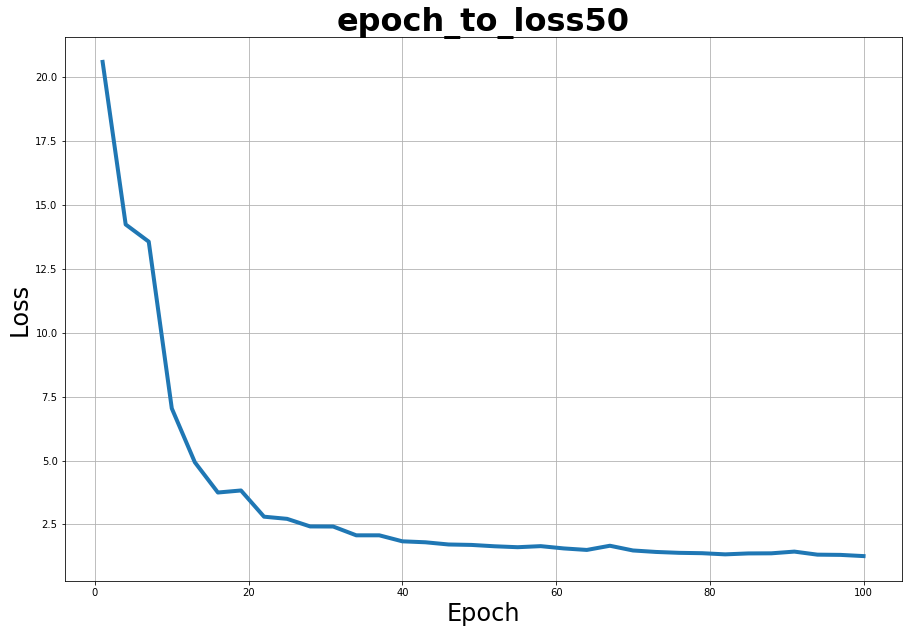

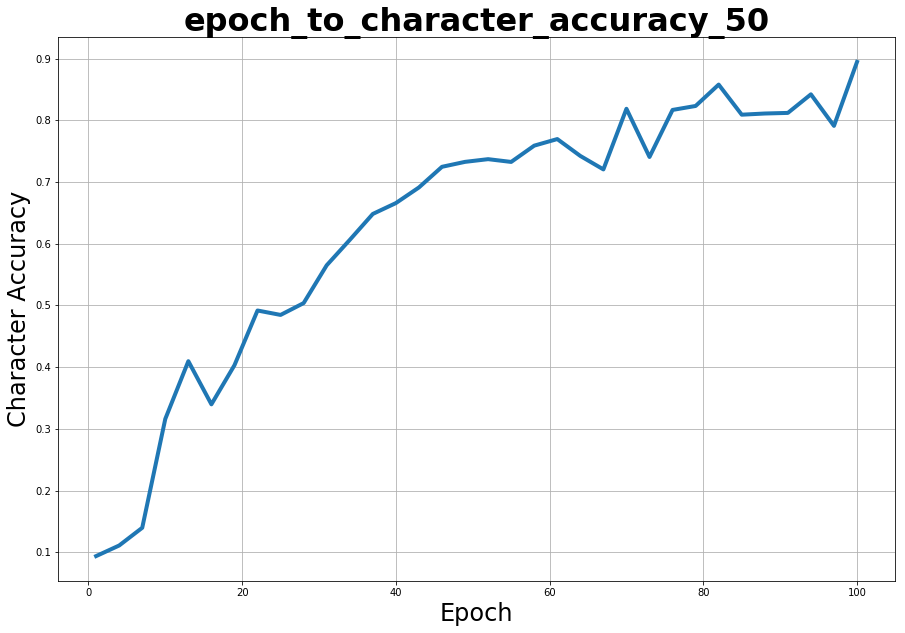

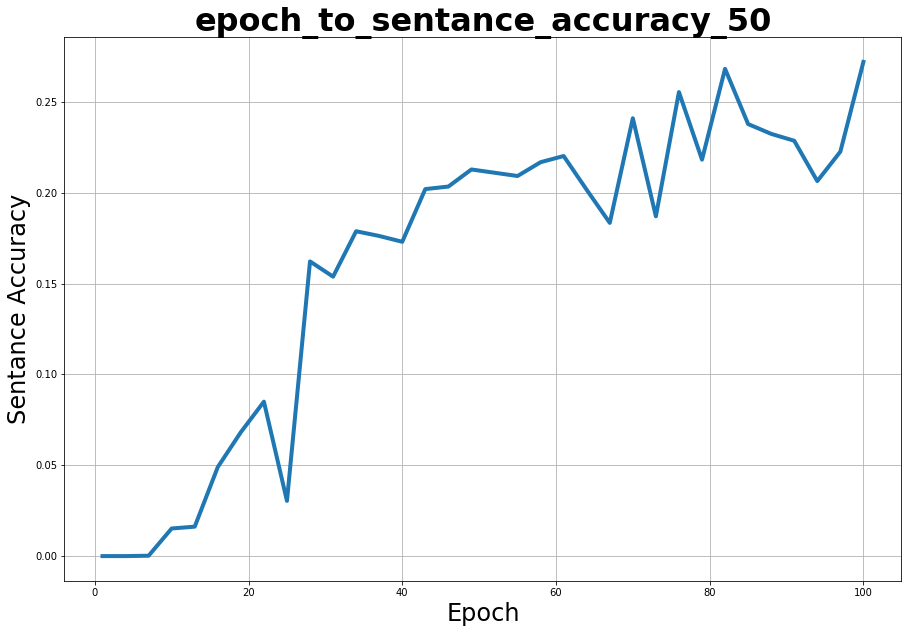

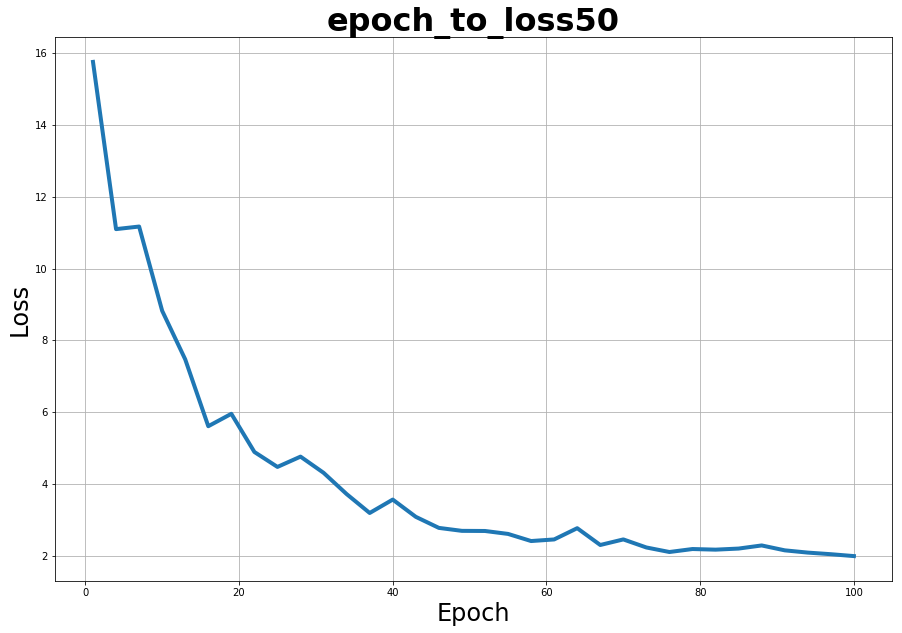

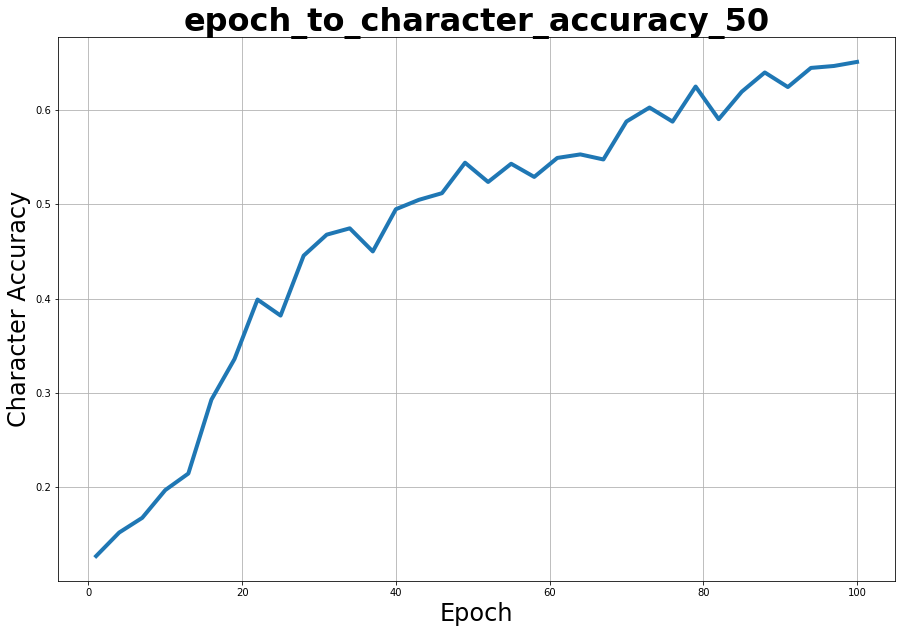

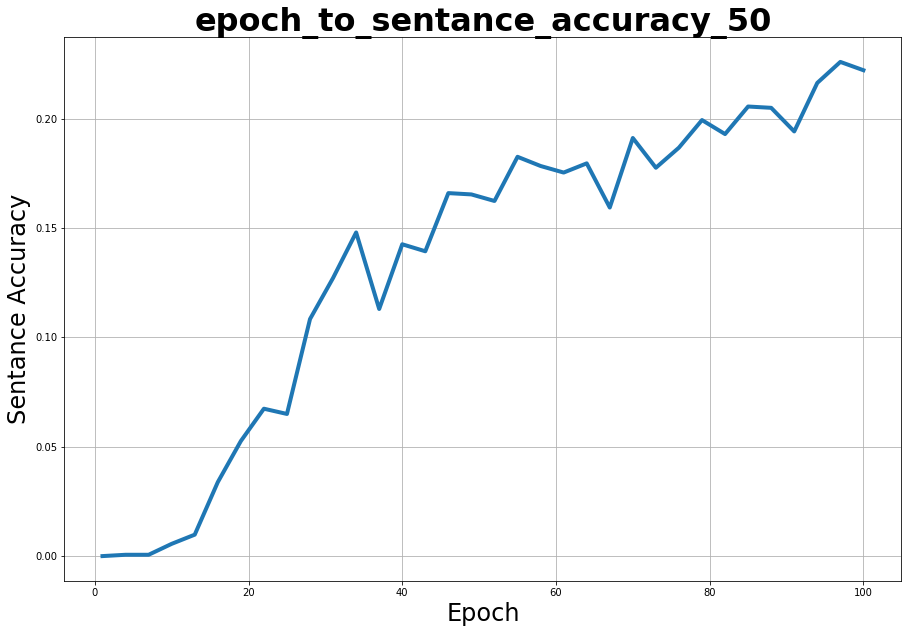

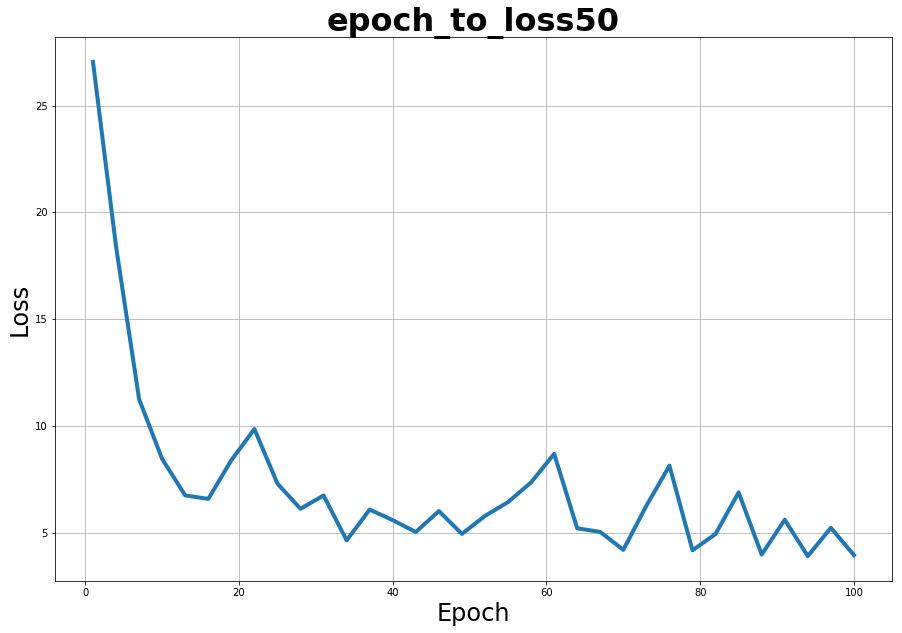

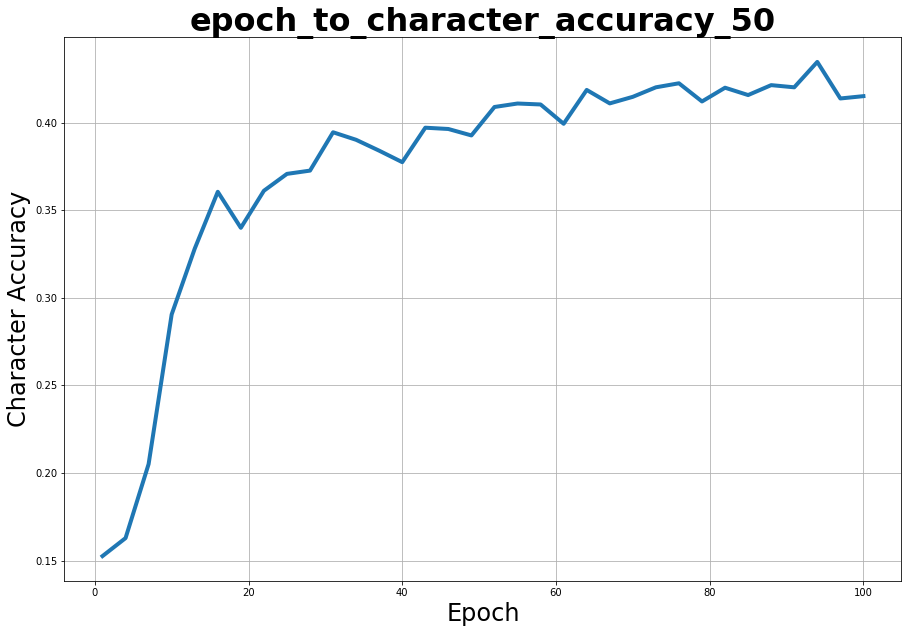

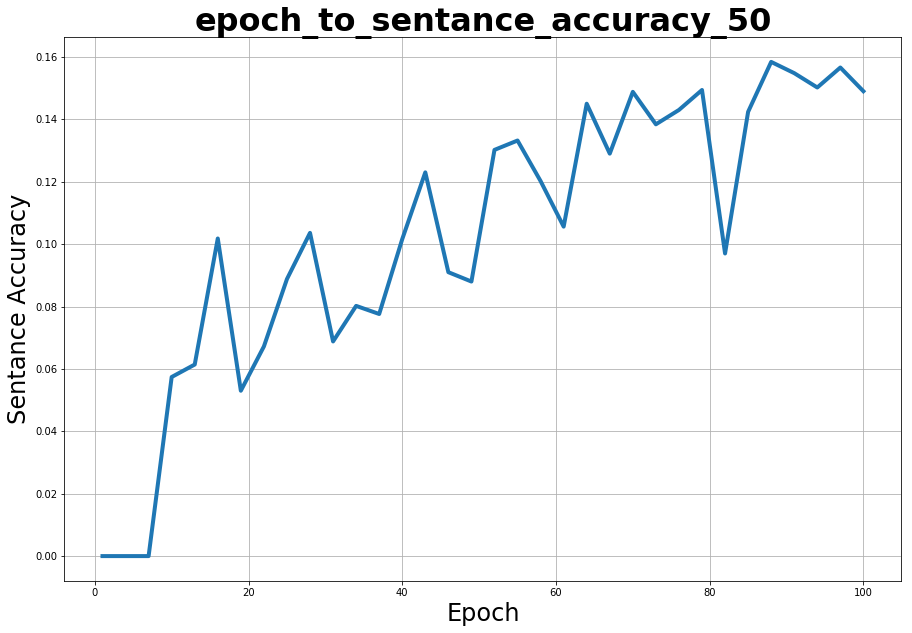

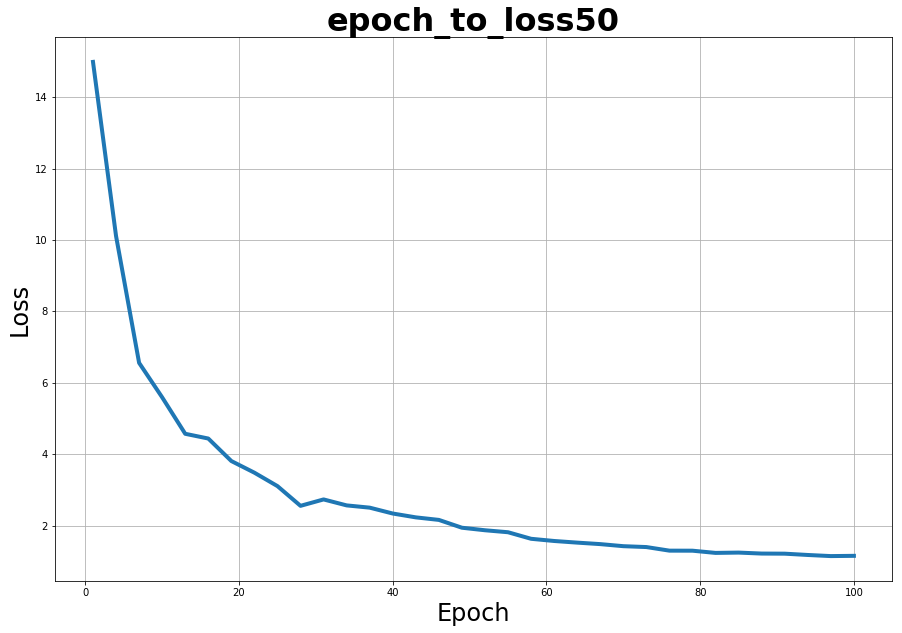

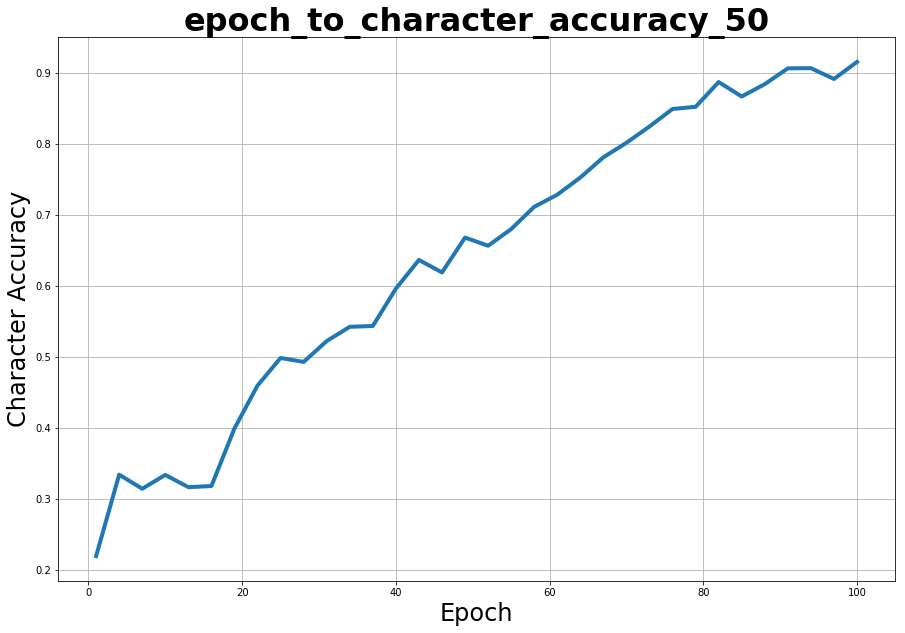

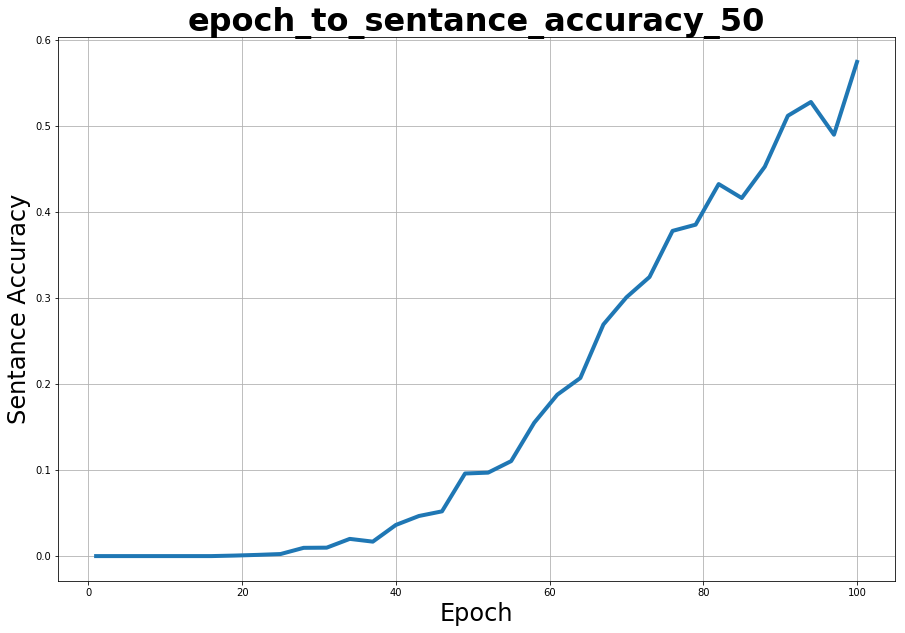

In [4]:
for i, j in zip(data_name, data_path):
    print("data : %s" % i)
    train_path = j + "/data_train.txt"
    dev_path = j + "/data_test.txt"

    src = fields.SourceField()
    tgt = fields.TargetField()
    max_len = 104
    def len_filter(example):
        return len(example.src) <= max_len and len(example.tgt) <= max_len
    train = torchtext.data.TabularDataset(
        path=train_path, format='tsv',
        fields=[('src', src), ('tgt', tgt)],
        filter_pred=len_filter
    )
    dev = torchtext.data.TabularDataset(
        path=dev_path, format='tsv',
        fields=[('src', src), ('tgt', tgt)],
        filter_pred=len_filter
    )
    src.build_vocab(train)
    tgt.build_vocab(train)
    input_vocab = src.vocab
    output_vocab = tgt.vocab

    weight = torch.ones(len(tgt.vocab))
    pad = tgt.vocab.stoi[tgt.pad_token]
    loss = Perplexity(weight, pad)
    if torch.cuda.is_available():
        loss.cuda()
    
    optimizer = "Adam"
    hidden_size = 50
    bidirectional = True

    seq2seq = None
    encoder = EncoderRNN(len(src.vocab), max_len, hidden_size,
                         bidirectional=bidirectional, variable_lengths=True)
    decoder = DecoderRNN(len(tgt.vocab), max_len, hidden_size * 2 if bidirectional else hidden_size,
                         dropout_p=0.2, use_attention="Luong", bidirectional=bidirectional,
                         eos_id=tgt.eos_id, sos_id=tgt.sos_id)
    seq2seq = Seq2seq(encoder, decoder)
    if torch.cuda.is_available():
        seq2seq.cuda()

    for param in seq2seq.parameters():
        param.data.uniform_(-0.08, 0.08)

    # train
    t = SupervisedTrainer(loss=loss, batch_size=32,
                          checkpoint_every=50,
                          print_every=100,
                          hidden_size=hidden_size,
                          path="data_to_accuracy/" + i)

    seq2seq, ave_loss, character_accuracy_list, sentance_accuracy_list = t.train(seq2seq, train,
                                                                             num_epochs=100, dev_data=dev,
                                                                             optimizer=optimizer,
                                                                             teacher_forcing_ratio=0.5)

    character_accuracy.append(character_accuracy_list)
    sentance_accuracy.append(sentance_accuracy_list)
    torch.save(seq2seq.state_dict(), 'log/pth/data_to_accuracy_' + i + '_model_save.pth')

- unMatching Data

In [4]:
c_0 = [0.09401384951661391, 0.10516326143258616, 0.10973078547943696, 0.11118492349703356, 0.13192858498594842, 0.14747408572985482, 0.13988501594959804, 0.19965468048761073, 0.23048852914704857, 0.31624899741010365, 0.26003967500780645, 0.3833505788999982, 0.40973629589718785, 0.446953045118076, 0.43666387063988193, 0.3398825668750421, 0.44709998959143316, 0.4317749055575624, 0.40324930966710953, 0.4202458870854176, 0.46710892871356235, 0.4918629497878489, 0.5148781279274094, 0.5297715625707936, 0.48469328402529893, 0.5415699792440931, 0.5070686414371169, 0.5038603537688197, 0.5755600727375143, 0.5510632044916027, 0.5651055857267935, 0.5900494100791663, 0.6182413195613707, 0.6062224861780354, 0.6354552523465196, 0.6198699541410789, 0.648285341676514, 0.6686371512364765, 0.6368971449913364, 0.6658727583314455, 0.6437423083752227, 0.7021772272802415, 0.6911870052104061, 0.7055049073331415, 0.6864541686310286, 0.7246413636447128, 0.6006875776815835, 0.6593337292670532, 0.7326528987858713, 0.6878807545598707, 0.7367918347854304, 0.7370244968682459, 0.7022384541441403, 0.73246003416459, 0.7325426904308534, 0.6878287117255567, 0.7659021472261169, 0.7589192233984583, 0.7861621164902313, 0.7591212720493243, 0.76958494308963, 0.7043844557237934, 0.7931236109155253, 0.7422195962700594, 0.7783740594023033, 0.7816833713960337, 0.7204289554084751, 0.7451033815596931, 0.7740789948998023, 0.818639906445352, 0.7942685532704329, 0.8159030656290754, 0.7405879003471563, 0.8305913902783986, 0.767380775989273, 0.8167877938124132, 0.7963839414181366, 0.8591751516895553, 0.8232104918353977, 0.8590741273641223, 0.653967194646323, 0.8578281606837816, 0.8104140772805476, 0.8622150654821309, 0.809067086274774, 0.8089017737422471, 0.7821548182480546, 0.8109773644284166, 0.8751829152558976, 0.8808831362848764, 0.8119661782803823, 0.8545372167492209, 0.828215787959125, 0.8420438751706699, 0.8295995150832379, 0.867024435641382, 0.7909806706790672, 0.7826017743545158, 0.774143283106896, 0.894573463052649]
c_1 = [0.12704222382954905, 0.14883200244249062, 0.14319464687473876, 0.1520123287621443, 0.1636832176906106, 0.14468122226301117, 0.16761228369237702, 0.17410741870177263, 0.19438517931588456, 0.19704574944844055, 0.21609136077985236, 0.21204598570125285, 0.21457934278102272, 0.25718117682977804, 0.2628403403494361, 0.292869890124269, 0.3105488698028925, 0.3085279995929182, 0.335886075259242, 0.33421413227976693, 0.38384539615961966, 0.3990273653449836, 0.3971736894329569, 0.42724322045295116, 0.38202443217545223, 0.44010991207760725, 0.3439332095126286, 0.44554736141955226, 0.4508248857808519, 0.460703887994359, 0.4678060109984771, 0.37385371952793056, 0.46934347160786394, 0.4745373988201898, 0.43116501713741556, 0.43315317541953047, 0.45002889553627573, 0.47558418051168727, 0.40178607126111754, 0.4948115247756507, 0.4846671924806182, 0.5152528450290591, 0.5047523161862254, 0.4800548106524576, 0.49127863656684684, 0.511799919310578, 0.46084200502309824, 0.5180042816278909, 0.5441011307423064, 0.4996928713439877, 0.5279668809903718, 0.523659810488898, 0.5462564833223688, 0.5507961719775087, 0.5429889251950903, 0.5599264345089031, 0.5337350842695608, 0.5290209319991713, 0.5768966557505751, 0.5500328936607919, 0.5491460369499398, 0.5635283812320766, 0.5584216858273755, 0.5529006393364567, 0.5694674134678641, 0.5677663932191809, 0.5475322485088813, 0.575537293415089, 0.5430325410989026, 0.5877751890931163, 0.6022847464280392, 0.589396246851477, 0.602590057754726, 0.6033351627781877, 0.5919296039312468, 0.5876552453576322, 0.6077403690632395, 0.5964801965623399, 0.6248596113096039, 0.5964911005382929, 0.5941249377564706, 0.5902467569758186, 0.5812582461318145, 0.62364926997881, 0.619342199477336, 0.5903557967353495, 0.5966801027881466, 0.6397726157547914, 0.6370248138146106, 0.6003438387083877, 0.6243071431946469, 0.5900541200673138, 0.59538979896703, 0.6445849038087588, 0.6056686136321507, 0.6440324356938019, 0.6466530245811964, 0.6173249639260129, 0.6163872219940464, 0.6509600950826703]
c_2 = [0.15262991196435385, 0.16005859445296247, 0.17087049474161572, 0.1629055362400213, 0.20937079347254914, 0.22554905305893277, 0.20513457288674858, 0.2275609878995976, 0.2743717652478747, 0.29052123149127923, 0.29856177251819377, 0.32498686303726576, 0.3280497548966679, 0.3454949215741321, 0.33047199487478496, 0.36048905493050004, 0.3520166137588989, 0.31860193923164964, 0.33993780637916515, 0.32671086444813957, 0.32775102396325967, 0.36108651679731646, 0.37682207873539636, 0.3669135695827125, 0.3707178900238265, 0.37772187070349333, 0.38379366690421174, 0.3725822589817234, 0.36153641278136495, 0.3760374601392158, 0.3944616004779695, 0.3874396239589407, 0.3978196241029074, 0.3901533965347212, 0.38545648246125497, 0.3872488680617041, 0.3839520302905968, 0.36978210637700565, 0.3951706365488299, 0.3774051439307232, 0.38203007464674166, 0.3997055880680387, 0.39706739801757834, 0.39164705120176213, 0.39693062963842757, 0.3963295686037388, 0.4006377725469871, 0.3948179180973359, 0.39265481820603076, 0.3947567322435053, 0.4016563370548729, 0.40888706531050023, 0.40336594179425717, 0.39776923575269396, 0.4108666076403136, 0.3954765658179829, 0.4006557683863491, 0.4103267324594554, 0.40019147573081104, 0.408829478624542, 0.3992988820984588, 0.411269714442021, 0.36780976238293706, 0.4186120169016923, 0.40807725253921295, 0.3982371275761044, 0.4109349918298889, 0.41070104591818374, 0.4058637642976944, 0.4146889239207895, 0.404190151237034, 0.418525636872755, 0.4201092707366057, 0.4130656992103426, 0.4122522872711829, 0.42241273817493397, 0.41652090036783496, 0.41568589342144097, 0.41203633719883964, 0.4054678558317317, 0.4112769127777658, 0.4198825231606453, 0.4172119405993334, 0.4155815175531417, 0.4156966909250581, 0.41310529005693886, 0.3988705811216447, 0.4213545828204519, 0.42334132348601006, 0.4116656229079837, 0.4201092707366057, 0.4110717602090397, 0.4122918781177792, 0.4346067189265842, 0.41281015829140305, 0.41726952728529165, 0.4137459419382239, 0.40205224552083557, 0.4206311500781019, 0.41506683654739024]
c_3 = [0.21899105007122316, 0.14223801972747063, 0.2618694062945145, 0.33389550353428116, 0.29044601822237753, 0.34002674227967855, 0.31403364958206786, 0.3020735345499503, 0.30966619184562044, 0.33356290482973633, 0.25576168462923643, 0.3616758943209611, 0.31625097427903354, 0.30197946622947297, 0.2941684360469804, 0.3178602144757707, 0.3683211492461096, 0.3899971779503857, 0.3990915687908189, 0.4160137877281157, 0.4650804956056656, 0.45964133093235143, 0.41859058779261965, 0.41612465396296394, 0.4985721772784691, 0.4206332141801274, 0.486904345956406, 0.493028865536055, 0.5220019082430726, 0.536112156314672, 0.5223949794393528, 0.5236548230171741, 0.49161112156314674, 0.5425256000215013, 0.5797094632730401, 0.5957649098287957, 0.5437048136103422, 0.5781002230763028, 0.5888307307764667, 0.5963427580831564, 0.5955398177762249, 0.6041201924369071, 0.6368895637917596, 0.6385525573144838, 0.6240962722068428, 0.6192349557878893, 0.636983632112237, 0.6526896820490767, 0.6684696428091488, 0.678676055580939, 0.6738180987448599, 0.6569261160534308, 0.661606014997178, 0.6865677157524122, 0.6803928024296504, 0.6619184562044776, 0.711946004784046, 0.7118384981320719, 0.709755556750074, 0.7468520708468837, 0.7289589324589459, 0.7292444970032521, 0.7503628349504126, 0.7532151208106002, 0.78643131668772, 0.7743435375063832, 0.7817312602467278, 0.7793090009944366, 0.7862163033837719, 0.8022112774477921, 0.8128779530733464, 0.7991103824549144, 0.8252378584674926, 0.8338215927110489, 0.8257720321444889, 0.8499207138441691, 0.833062326981482, 0.8562602467277662, 0.8529812938425565, 0.8677130647458812, 0.866033273308786, 0.8878974386540167, 0.8716504958744322, 0.8738107076625367, 0.8675282876878007, 0.8572311661784073, 0.8653546375681995, 0.8849947590507162, 0.8804022092616981, 0.8919994893434031, 0.907265433923724, 0.9122342569946515, 0.8927419571585992, 0.9075174026392883, 0.9169712688472599, 0.9160171473109898, 0.8922413793103449, 0.9157248636009353, 0.9212312199317333, 0.9163329481011637]
character_accuracy.append(c_0)
character_accuracy.append(c_1)
character_accuracy.append(c_2)
character_accuracy.append(c_3)
s_0 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0002, 0.0024, 0.0044, 0.0152, 0.014, 0.031, 0.0162, 0.0408, 0.0198, 0.049, 0.0484, 0.041, 0.0682, 0.0588, 0.0952, 0.085, 0.0718, 0.1412, 0.0304, 0.1176, 0.131, 0.1622, 0.142, 0.1648, 0.1538, 0.1698, 0.1736, 0.1788, 0.1856, 0.1804, 0.1762, 0.174, 0.177, 0.173, 0.1812, 0.1796, 0.202, 0.2058, 0.2004, 0.2034, 0.2038, 0.2022, 0.2128, 0.2098, 0.2044, 0.211, 0.1998, 0.1944, 0.2092, 0.1948, 0.2218, 0.2168, 0.224, 0.2064, 0.2202, 0.1926, 0.22, 0.2016, 0.2282, 0.2284, 0.1834, 0.2202, 0.1954, 0.241, 0.2212, 0.2302, 0.187, 0.2246, 0.2284, 0.2554, 0.24, 0.2386, 0.2182, 0.2512, 0.2262, 0.2682, 0.1922, 0.2374, 0.2378, 0.2404, 0.2366, 0.2324, 0.2324, 0.2642, 0.2286, 0.2482, 0.2472, 0.2064, 0.255, 0.2512, 0.2226, 0.2468, 0.2584, 0.272]
s_1 = [0.0, 0.0, 0.0, 0.0006, 0.0024, 0.0008, 0.0006, 0.0006, 0.002, 0.0056, 0.0046, 0.0098, 0.0098, 0.017, 0.0224, 0.0338, 0.0416, 0.0328, 0.0526, 0.0502, 0.051, 0.0674, 0.0772, 0.0906, 0.065, 0.1008, 0.0966, 0.1084, 0.1182, 0.1252, 0.1272, 0.1102, 0.1092, 0.148, 0.1264, 0.1154, 0.113, 0.112, 0.1294, 0.1426, 0.111, 0.1266, 0.1394, 0.1486, 0.1618, 0.166, 0.151, 0.1438, 0.1654, 0.1704, 0.1544, 0.1624, 0.16, 0.1556, 0.1826, 0.1496, 0.169, 0.1784, 0.1886, 0.1798, 0.1754, 0.1732, 0.162, 0.1796, 0.1708, 0.1772, 0.1594, 0.1862, 0.1898, 0.1912, 0.1756, 0.1844, 0.1776, 0.1896, 0.1834, 0.1868, 0.1874, 0.1946, 0.1994, 0.1964, 0.202, 0.193, 0.2006, 0.1882, 0.2056, 0.2058, 0.1992, 0.205, 0.209, 0.186, 0.1942, 0.205, 0.1674, 0.2164, 0.208, 0.1954, 0.226, 0.2046, 0.2198, 0.2222]
s_2 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015, 0.0354, 0.0574, 0.072, 0.0874, 0.0614, 0.0604, 0.0614, 0.1018, 0.0708, 0.1024, 0.053, 0.093, 0.09, 0.0672, 0.0612, 0.0938, 0.0888, 0.1228, 0.111, 0.1036, 0.1176, 0.1052, 0.0688, 0.1124, 0.0744, 0.0802, 0.1186, 0.1132, 0.0776, 0.1134, 0.1132, 0.1016, 0.098, 0.1282, 0.123, 0.1158, 0.0786, 0.091, 0.1106, 0.112, 0.088, 0.1334, 0.1212, 0.1302, 0.1448, 0.1308, 0.1332, 0.129, 0.1388, 0.1202, 0.1462, 0.1374, 0.1056, 0.1456, 0.1092, 0.145, 0.1012, 0.1432, 0.129, 0.1512, 0.1252, 0.1488, 0.1396, 0.1396, 0.1384, 0.1586, 0.1446, 0.143, 0.1484, 0.138, 0.1494, 0.0922, 0.1452, 0.097, 0.156, 0.1398, 0.1424, 0.1556, 0.1252, 0.1584, 0.1622, 0.1466, 0.1548, 0.1286, 0.1472, 0.1502, 0.15, 0.1454, 0.1566, 0.143, 0.1514, 0.149]
s_3 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0002, 0.0004, 0.0006, 0.0008, 0.0004, 0.0014, 0.0014, 0.0022, 0.0024, 0.0052, 0.0044, 0.0096, 0.0076, 0.0114, 0.0098, 0.0156, 0.0074, 0.02, 0.0244, 0.0226, 0.0168, 0.015, 0.019, 0.0362, 0.0344, 0.0472, 0.0466, 0.0468, 0.0504, 0.052, 0.0794, 0.0908, 0.096, 0.0864, 0.1068, 0.097, 0.116, 0.1374, 0.1104, 0.1292, 0.1636, 0.155, 0.1514, 0.1922, 0.1876, 0.207, 0.224, 0.207, 0.2544, 0.2634, 0.2692, 0.2324, 0.2878, 0.3008, 0.3056, 0.2542, 0.3244, 0.349, 0.3296, 0.378, 0.3436, 0.3734, 0.3852, 0.4078, 0.3836, 0.4324, 0.4082, 0.4356, 0.4162, 0.4028, 0.405, 0.4526, 0.4614, 0.5054, 0.5118, 0.533, 0.4926, 0.5278, 0.5512, 0.5578, 0.4898, 0.5466, 0.5724, 0.5744]
sentance_accuracy.append(s_0)
sentance_accuracy.append(s_1)
sentance_accuracy.append(s_2)
sentance_accuracy.append(s_3)

data : unMatching_rand


/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/modules/rnn.py:38: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
2019-02-28 15:02:25,639 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
2019-02-28 15:04:19,869 INFO   Finished epoch 1: Train loss: 2.0323, 

2019-02-28 16:14:40,514 INFO   Finished epoch 46: Train loss: 1.2609, Dev loss: 1.3124, Accuracy(character): 0.9110, Accuracy(sentance): 0.1566, F1 Score: 0.4086
2019-02-28 16:16:01,362 INFO   Finished epoch 47: Train loss: 1.2557, Dev loss: 1.3070, Accuracy(character): 0.9099, Accuracy(sentance): 0.1504, F1 Score: 0.3901
2019-02-28 16:17:23,184 INFO   Finished epoch 48: Train loss: 1.2508, Dev loss: 1.2924, Accuracy(character): 0.9128, Accuracy(sentance): 0.1652, F1 Score: 0.4416
2019-02-28 16:18:42,946 INFO   Finished epoch 49: Train loss: 1.2417, Dev loss: 1.2902, Accuracy(character): 0.9137, Accuracy(sentance): 0.1690, F1 Score: 0.4493
2019-02-28 16:20:01,748 INFO   Finished epoch 50: Train loss: 1.2344, Dev loss: 1.2826, Accuracy(character): 0.9142, Accuracy(sentance): 0.1612, F1 Score: 0.4579
2019-02-28 16:21:27,160 INFO   Finished epoch 51: Train loss: 1.2343, Dev loss: 1.2988, Accuracy(character): 0.9107, Accuracy(sentance): 0.1786, F1 Score: 0.4493
2019-02-28 16:22:49,453 INFO

2019-02-28 17:04:52,173 INFO   Finished epoch 97: Train loss: 1.1416, Dev loss: 1.1803, Accuracy(character): 0.9345, Accuracy(sentance): 0.2508, F1 Score: 0.6624
2019-02-28 17:05:16,410 INFO   Finished epoch 98: Train loss: 1.1369, Dev loss: 1.2037, Accuracy(character): 0.9255, Accuracy(sentance): 0.2236, F1 Score: 0.6136
2019-02-28 17:05:40,617 INFO   Finished epoch 99: Train loss: 1.1319, Dev loss: 1.2064, Accuracy(character): 0.9245, Accuracy(sentance): 0.2532, F1 Score: 0.6239
2019-02-28 17:06:04,754 INFO   Finished epoch 100: Train loss: 1.1312, Dev loss: 1.3368, Accuracy(character): 0.9032, Accuracy(sentance): 0.2314, F1 Score: 0.5168


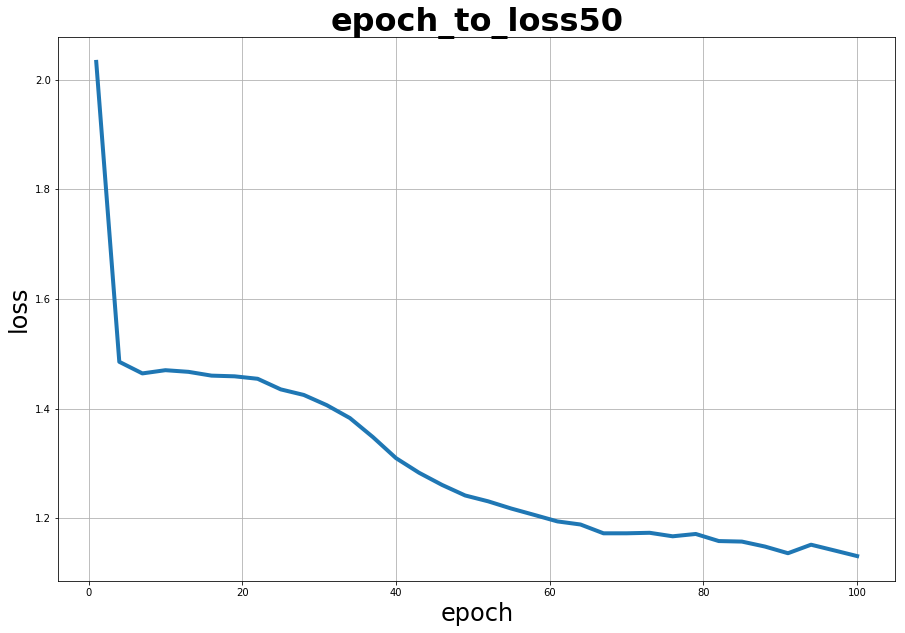

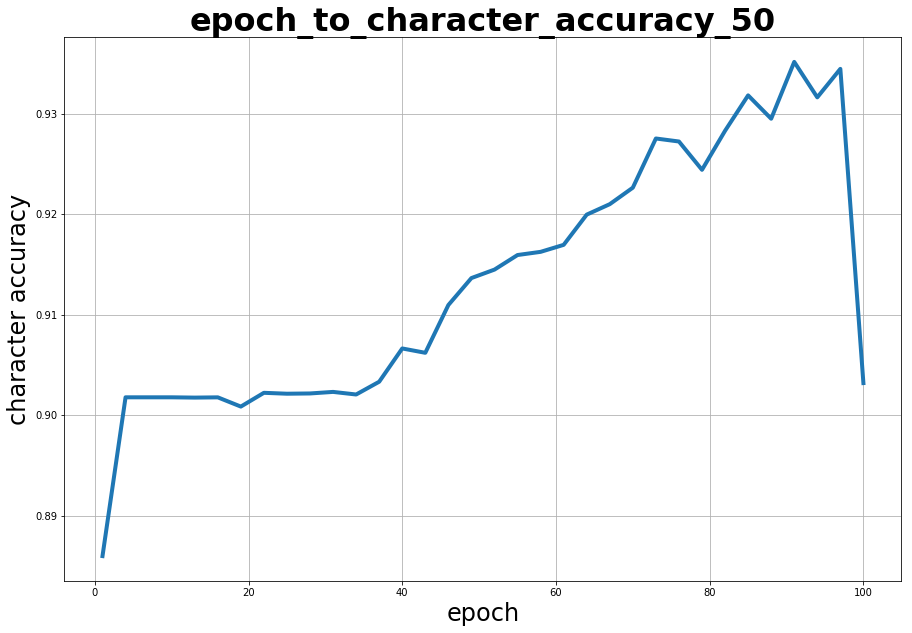

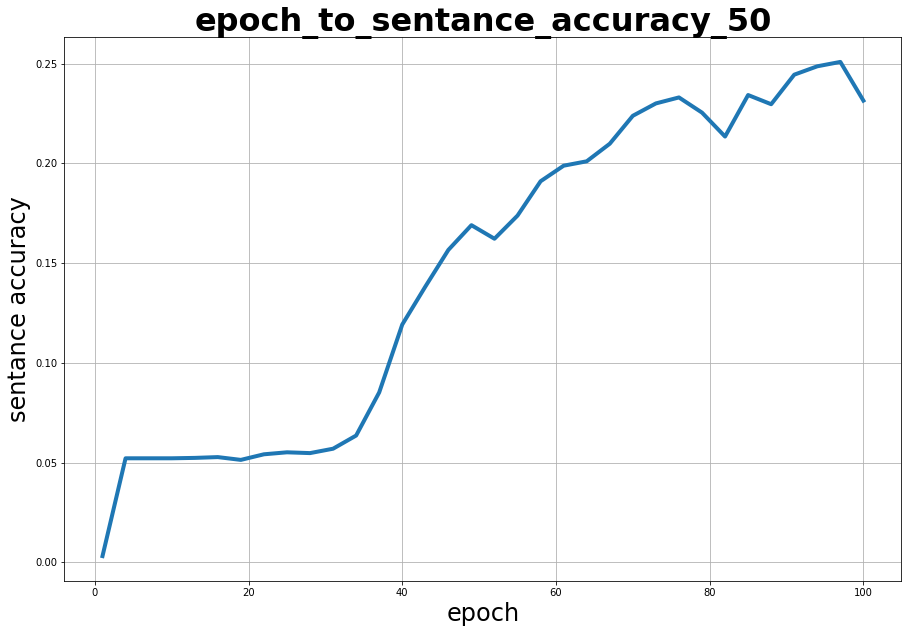

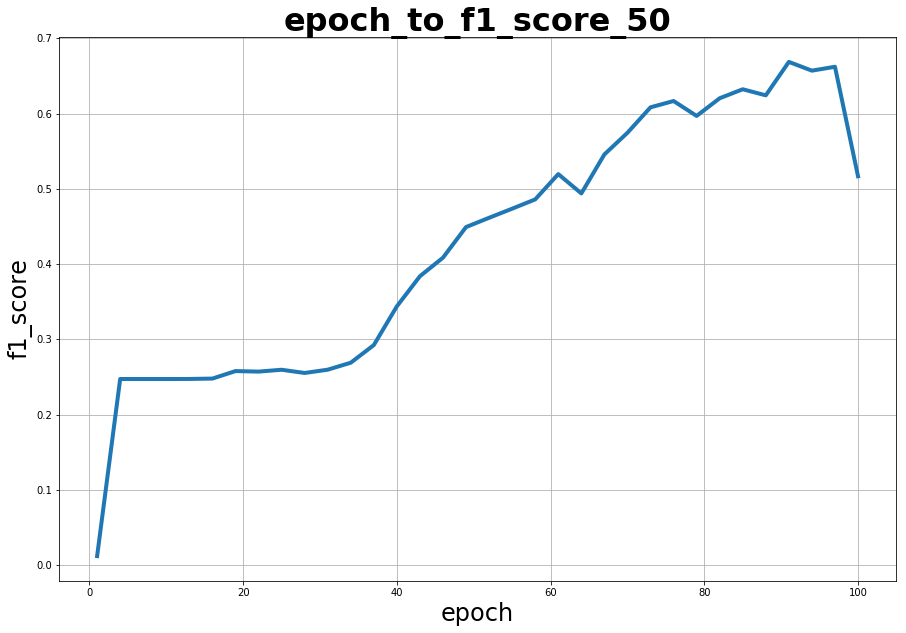

In [5]:
print("data : %s" % "unMatching_rand")
train_path = "data/unmatching_rand/N100" + "/data_train.txt"
dev_path = "data/unmatching_rand/N100" + "/data_test.txt"

src = fields.SourceField()
tgt = fields.TargetField()
max_len = 104
def len_filter(example):
    return len(example.src) <= max_len and len(example.tgt) <= max_len
train = torchtext.data.TabularDataset(
    path=train_path, format='tsv',
    fields=[('src', src), ('tgt', tgt)],
    filter_pred=len_filter
)
dev = torchtext.data.TabularDataset(
    path=dev_path, format='tsv',
    fields=[('src', src), ('tgt', tgt)],
    filter_pred=len_filter
)
src.build_vocab(train)
tgt.build_vocab(train)
input_vocab = src.vocab
output_vocab = tgt.vocab

weight = torch.ones(len(tgt.vocab))
pad = tgt.vocab.stoi[tgt.pad_token]
loss = Perplexity(weight, pad)
if torch.cuda.is_available():
    loss.cuda()
    
optimizer = "Adam"
hidden_size = 50
bidirectional = True

seq2seq = None
encoder = EncoderRNN(len(src.vocab), max_len, hidden_size,
                         bidirectional=bidirectional, variable_lengths=True)
decoder = DecoderRNN(len(tgt.vocab), max_len, hidden_size * 2 if bidirectional else hidden_size,
                         dropout_p=0.2, use_attention="Luong", bidirectional=bidirectional,
                         eos_id=tgt.eos_id, sos_id=tgt.sos_id)
seq2seq = Seq2seq(encoder, decoder)
if torch.cuda.is_available():
    seq2seq.cuda()

for param in seq2seq.parameters():
    param.data.uniform_(-0.08, 0.08)

# train
t = SupervisedTrainer_unmatching(loss=loss, batch_size=32,
                                    checkpoint_every=50,
                                    print_every=100,
                                    hidden_size=hidden_size,
                                    path="data_to_accuracy/" + "unMatching_rand")

seq2seq, ave_loss, character_accuracy_list, sentance_accuracy_list, f1_score_list = t.train(seq2seq, train,
                                                                                             num_epochs=100, dev_data=dev,
                                                                                             optimizer=optimizer,
                                                                                             teacher_forcing_ratio=0.5)

character_accuracy.append(character_accuracy_list)
sentance_accuracy.append(sentance_accuracy_list)
torch.save(seq2seq.state_dict(), 'log/pth/data_to_accuracy' + '_unMatching_rand' + '_model_save.pth')

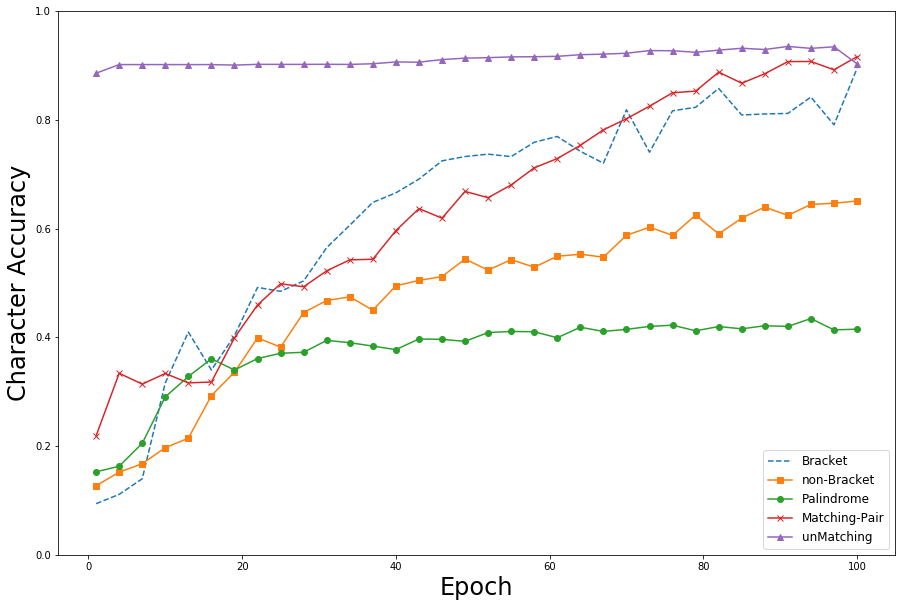

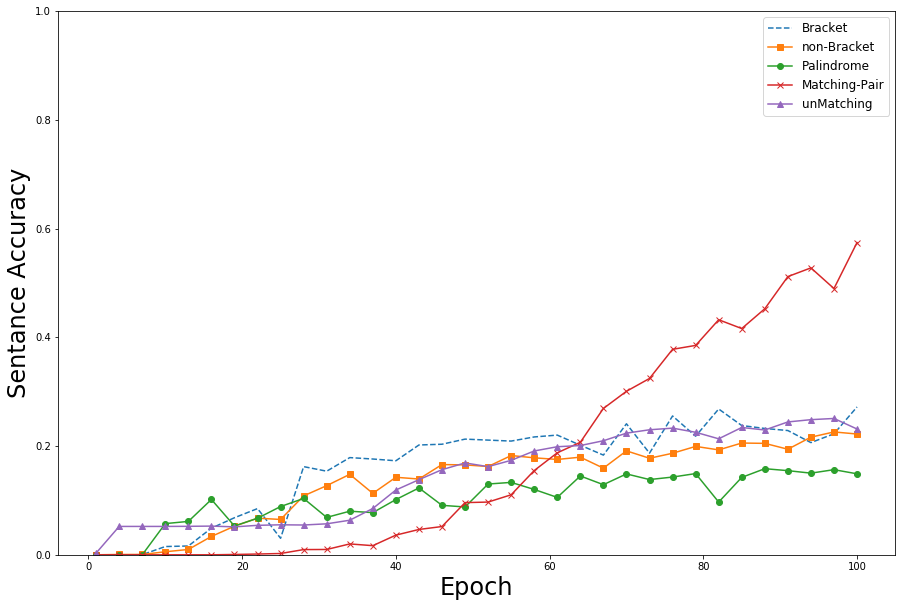

In [6]:
epochs = list(range(1, 101, 1))
plt.figure(figsize=(15,10))
plt.plot(epochs[::3], character_accuracy[0][::3], '--', label="Bracket")
plt.plot(epochs[::3], character_accuracy[1][::3], '-s', label="non-Bracket")
plt.plot(epochs[::3], character_accuracy[2][::3], '-o', label="Palindrome")
plt.plot(epochs[::3], character_accuracy[3][::3], '-x', label="Matching-Pair")
plt.plot(epochs[::3], character_accuracy[4][::3], '-^', label="unMatching")
plt.legend(loc="best", fontsize=12)
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Character Accuracy', fontsize=24)
plt.ylim([0, 1])
plt.savefig('log/plot/data_to_accuracy/rand_data_to_character_accuracy.png')

plt.figure(figsize=(15,10))
plt.plot(epochs[::3], sentance_accuracy[0][::3], '--', label="Bracket")
plt.plot(epochs[::3], sentance_accuracy[1][::3], '-s', label="non-Bracket")
plt.plot(epochs[::3], sentance_accuracy[2][::3], '-o', label="Palindrome")
plt.plot(epochs[::3], sentance_accuracy[3][::3], '-x', label="Matching-Pair")
plt.plot(epochs[::3], sentance_accuracy[4][::3], '-^', label="unMatching")
plt.legend(loc="best", fontsize=12)
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Sentance Accuracy', fontsize=24)
plt.ylim([0, 1])
plt.savefig('log/plot/data_to_accuracy/rand_data_to_sentance_accuracy.png')

In [7]:
print(character_accuracy[0])
print(character_accuracy[1])
print(character_accuracy[2])
print(character_accuracy[3])
print(character_accuracy[4])

[0.09401384951661391, 0.10516326143258616, 0.10973078547943696, 0.11118492349703356, 0.13192858498594842, 0.14747408572985482, 0.13988501594959804, 0.19965468048761073, 0.23048852914704857, 0.31624899741010365, 0.26003967500780645, 0.3833505788999982, 0.40973629589718785, 0.446953045118076, 0.43666387063988193, 0.3398825668750421, 0.44709998959143316, 0.4317749055575624, 0.40324930966710953, 0.4202458870854176, 0.46710892871356235, 0.4918629497878489, 0.5148781279274094, 0.5297715625707936, 0.48469328402529893, 0.5415699792440931, 0.5070686414371169, 0.5038603537688197, 0.5755600727375143, 0.5510632044916027, 0.5651055857267935, 0.5900494100791663, 0.6182413195613707, 0.6062224861780354, 0.6354552523465196, 0.6198699541410789, 0.648285341676514, 0.6686371512364765, 0.6368971449913364, 0.6658727583314455, 0.6437423083752227, 0.7021772272802415, 0.6911870052104061, 0.7055049073331415, 0.6864541686310286, 0.7246413636447128, 0.6006875776815835, 0.6593337292670532, 0.7326528987858713, 0.68

In [8]:
print(sentance_accuracy[0])
print(sentance_accuracy[1])
print(sentance_accuracy[2])
print(sentance_accuracy[3])
print(sentance_accuracy[4])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0002, 0.0024, 0.0044, 0.0152, 0.014, 0.031, 0.0162, 0.0408, 0.0198, 0.049, 0.0484, 0.041, 0.0682, 0.0588, 0.0952, 0.085, 0.0718, 0.1412, 0.0304, 0.1176, 0.131, 0.1622, 0.142, 0.1648, 0.1538, 0.1698, 0.1736, 0.1788, 0.1856, 0.1804, 0.1762, 0.174, 0.177, 0.173, 0.1812, 0.1796, 0.202, 0.2058, 0.2004, 0.2034, 0.2038, 0.2022, 0.2128, 0.2098, 0.2044, 0.211, 0.1998, 0.1944, 0.2092, 0.1948, 0.2218, 0.2168, 0.224, 0.2064, 0.2202, 0.1926, 0.22, 0.2016, 0.2282, 0.2284, 0.1834, 0.2202, 0.1954, 0.241, 0.2212, 0.2302, 0.187, 0.2246, 0.2284, 0.2554, 0.24, 0.2386, 0.2182, 0.2512, 0.2262, 0.2682, 0.1922, 0.2374, 0.2378, 0.2404, 0.2366, 0.2324, 0.2324, 0.2642, 0.2286, 0.2482, 0.2472, 0.2064, 0.255, 0.2512, 0.2226, 0.2468, 0.2584, 0.272]
[0.0, 0.0, 0.0, 0.0006, 0.0024, 0.0008, 0.0006, 0.0006, 0.002, 0.0056, 0.0046, 0.0098, 0.0098, 0.017, 0.0224, 0.0338, 0.0416, 0.0328, 0.0526, 0.0502, 0.051, 0.0674, 0.0772, 0.0906, 0.065, 0.1008, 0.0966, 0.1084, 0.1182, 0.1252, 0.1272, 0.